In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

### Variables (Y2016 data): 
<br> Country
<br> Region
<br> Hemisphere (north/south)
<br> HappinessScore
<br> HDI - Human Development Index by UN
<br> GDP_PerCapita - Gross Domestic Product
<br> Beer_PerCapita (servings of beer per capita)
<br> Spirit_PerCapita (servings of spirit per capita)
<br> Wine_PerCapita (servings of wine per capita) 
<br> Standart serving of drink consist of 10-12 g of pure alcohol. It means that standart portions of various drinks are: 280–330 ml glass of beer, 30–40 ml of strong drink and 100–120 ml glass of wine.

# 1. Introduction

In [320]:
df = pd.read_csv('Happiness-and-Alcohol-Consumption.csv')

The table below shows that data has 10 columns (including number column) and 122 rows. Decribe function indicates some worth mentioning numbers e.g. Happiness score variates from min 3.069 to max 7.526 with mean ~5,52; min GDP per capita has value from ~3K to max amount of value with ~104K. Moreover, it should be noted that Beer per capita  values from "df.decribe" table exceed values in Wine per Capita or Spirit per Capita columns. It means that according to the data, beer is more favourable alcohol drink than two others.   
Also, the additional collumn of overall alcohol portions per Capita was created summing up three separate columns of different alcohol portions per capita, so using grouby function we can see countries where average number of alcohol portions per capita are highest. 

Additionally, you could see basic information charts in Tableau Online by using this link: https://dub01.online.tableau.com/#/site/danruminaite/views/Baigiamojoprojektografikai/Dashboard1?:iid=1

In [321]:
df.head(5)

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Albania,Central and Eastern Europe,north,4.655,782,4134.0,89,132,54
1,Angola,Sub-Saharan Africa,south,3.866,577,3506.0,217,57,45
2,Argentina,Latin America and Caribbean,south,6.650,822,12790.0,193,25,221
3,Armenia,Central and Eastern Europe,north,4.360,749,3591.0,21,179,11
4,Australia,Australia and New Zealand,south,7.313,938,49971.0,261,72,212


In [322]:
df['Overall_alco_PerCapita'] = df['Beer_PerCapita'] + df['Spirit_PerCapita'] + df['Wine_PerCapita'] 

In [323]:
df

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Overall_alco_PerCapita
0,Albania,Central and Eastern Europe,north,4.655,782,4134.0,89,132,54,275
1,Angola,Sub-Saharan Africa,south,3.866,577,3506.0,217,57,45,319
2,Argentina,Latin America and Caribbean,south,6.650,822,12790.0,193,25,221,439
3,Armenia,Central and Eastern Europe,north,4.360,749,3591.0,21,179,11,211
4,Australia,Australia and New Zealand,south,7.313,938,49971.0,261,72,212,545
...,...,...,...,...,...,...,...,...,...,...
117,Uzbekistan,Central and Eastern Europe,north,5.987,703,2567.0,25,101,8,134
118,Venezuela,Latin America and Caribbean,north,6.084,766,15692.0,333,100,3,436
119,Vietnam,Southeastern Asia,north,5.061,689,2192.0,111,2,1,114
120,Zambia,Sub-Saharan Africa,south,4.795,586,1280.0,32,19,4,55


In [324]:
df.isnull().sum()

Country                   0
Region                    0
Hemisphere                0
HappinessScore            0
HDI                       0
GDP_PerCapita             0
Beer_PerCapita            0
Spirit_PerCapita          0
Wine_PerCapita            0
Overall_alco_PerCapita    0
dtype: int64

In [325]:
df.groupby('Country')['Overall_alco_PerCapita'].sum().sort_values(ascending=False).head(15)

Country
Czech Republic        665
France                648
Russian Federation    646
Lithuania             643
Luxembourg            640
Germany               638
Hungary               634
Poland                614
Slovakia              605
Portugal              600
Slovenia              597
Ireland               596
Belgium               591
Romania               586
Denmark               583
Name: Overall_alco_PerCapita, dtype: int64

In [326]:
df.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Overall_alco_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,15812.648500,137.565574,96.598361,66.598361,300.762295
std,1.148736,149.846124,20003.007995,104.817353,81.435028,88.121503,205.128505
min,3.069000,351.000000,3.117000,1.000000,1.000000,1.000000,5.000000
25%,4.528250,663.750000,2398.250000,38.250000,25.500000,5.000000,112.500000
50%,5.542000,757.500000,6686.500000,125.500000,82.500000,16.000000,298.000000
75%,6.477000,861.500000,19599.250000,224.750000,142.500000,112.750000,473.500000
max,7.526000,951.000000,104278.000000,376.000000,373.000000,370.000000,665.000000


# 2. Pairplot and correlations


First graph shows hapiness distribution where most cases (countries) are in range between 5.5 and 6. Approximatelly equal amounts betveen 4 and 5.5 and from 6 to 7. Least amount af values are in range from 3 to 4. 
Pairplot below first graph shows links between eatch variable. At first glance, among all these tables, Happiness - HDI and Happiness - GDP per Capita seems most valid. Also, two correlation tables show in numbers that Happiness - HDI and Happiness - GDP per Capita correlates more than other variables.  

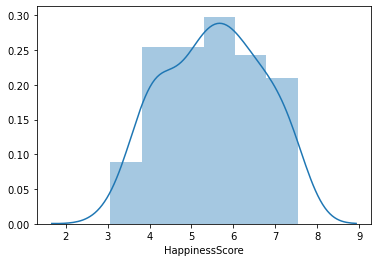

In [327]:
sns.distplot(df['HappinessScore']) 

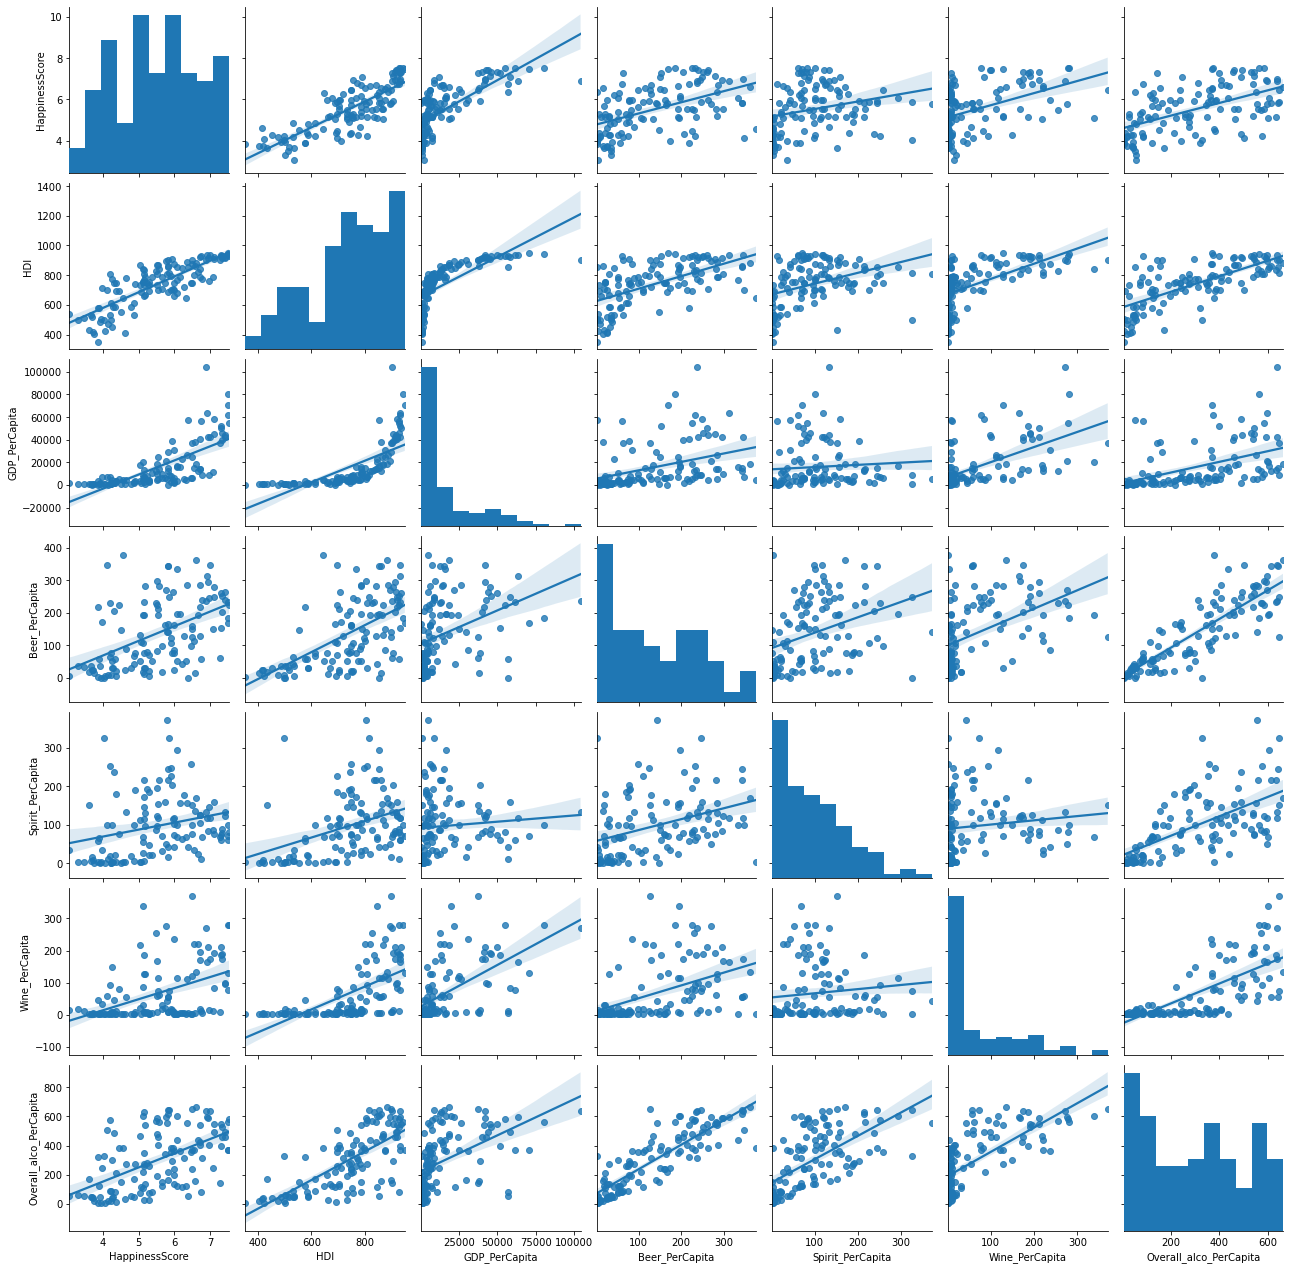

In [328]:
sns.pairplot(df, kind='reg')

In [329]:
df.corr()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Overall_alco_PerCapita
HappinessScore,1.000000,0.815163,0.718400,0.493367,0.256399,0.450589,0.547461
HDI,0.815163,1.000000,0.710034,0.588394,0.393413,0.602561,0.715698
GDP_PerCapita,0.718400,0.710034,1.000000,0.389891,0.079478,0.587467,0.483151
Beer_PerCapita,0.493367,0.588394,0.389891,1.000000,0.364855,0.474274,0.859574
Spirit_PerCapita,0.256399,0.393413,0.079478,0.364855,1.000000,0.118718,0.634431
Wine_PerCapita,0.450589,0.602561,0.587467,0.474274,0.118718,1.000000,0.719069
Overall_alco_PerCapita,0.547461,0.715698,0.483151,0.859574,0.634431,0.719069,1.000000


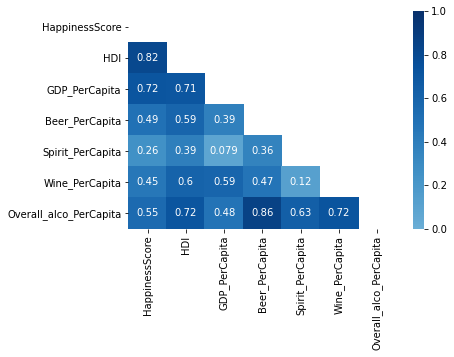

In [330]:
mask = np.zeros(df.corr().shape)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(df.corr(), vmin = 0, vmax = 1, center = 0, cmap = 'Blues', annot = True, mask = mask)

Looking bellow there are three regression models. First regresion is made using Happines Score and alcohol variables, second model using Happiness Score and five numerical variables and third regression using Happines Score and Human Development Index (HDI). Also R-squares, intercepts and slopes values are counted. 

# 3. First regression (Happiness & alcohol)



In [331]:
alc_variables = ['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']

In [332]:
X = df[alc_variables]
y = df['HappinessScore'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [333]:
X_train

,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
40,347,98,59
16,231,252,94
81,169,71,129
37,224,194,59
70,238,68,5
...,...,...,...
103,185,100,280
121,64,18,4
59,281,216,62
14,173,35,35


In [334]:
X_train.shape

(97, 3)

In [335]:
X_test.shape

(25, 3)

In [336]:
y_train.shape

(97,)

In [337]:
y_test.shape

(25,)

In [381]:
linear = LinearRegression()

In [382]:
linear.fit(X_train, y_train)

LinearRegression()

In [383]:
linear.score(X_test, y_test)

0.2650787666169411

In [384]:
#b0
print(linear.intercept_)
#b1
print(linear.coef_)

4.590480295465866
[0.00292494 0.00261601 0.00360873]


In [385]:
prediction = linear.predict(X_test)

Text(0, 0.5, 'prediction')

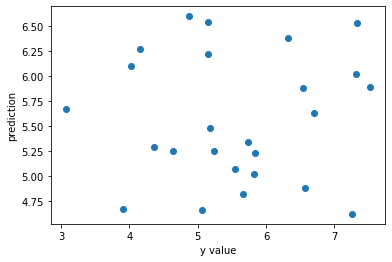

In [386]:
plt.scatter(y_test, predict)
plt.xlabel('y value')
plt.ylabel('prediction') 

In [387]:
value = np.array([500]).reshape(1,1)
linear2.predict(value)

array([4.00122067])

# 4. Second regression (Happiness & 5 variables) 

In [388]:
all_variables = ['HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']
X1 = df[all_variables]
y1 = df['HappinessScore']
X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, test_size = 0.2)

In [389]:
X1_train.shape

(97, 5)

In [390]:
linear1 = LinearRegression() 

In [391]:
linear1.fit(X1_train, y1_train)
prediction1 = linear1.predict(X1_test)

In [392]:
accuracy1 = linear1.score(X1_test, y1_test)
print(accuracy1)

0.842956385099339


In [393]:
#b0
print(linear1.intercept_)
#b1
print(linear1.coef_)

1.4622316605012733
[ 5.30182991e-03  1.84711224e-05  5.25630831e-04 -3.58724971e-04
 -2.51156490e-03]


Text(0, 0.5, 'prediction1')

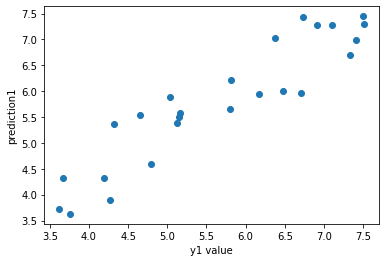

In [394]:
plt.scatter(y1_test, prediction1)
plt.xlabel('y1 value')
plt.ylabel('prediction1')

# 5. Third regression (Happiness & HDI) 

In [395]:
Hdi = ['HDI']
X2 = df[Hdi]
y2 = df['HappinessScore']
X2_train, X2_test, y2_train, y2_test = train_test_split (X2, y2, test_size = 0.2)

In [396]:
linear2 = LinearRegression()
linear2.fit(X2_train, y2_train)
prediction2 = linear2.predict(X2_test)

In [397]:
accuracy2 = linear2.score(X2_test, y2_test)
print(accuracy2)

0.7055807738866331


In [398]:
#b0
print(linear2.intercept_)
#b1
print(linear2.coef_)

1.0862842960377348
[0.0059836]


Text(0, 0.5, 'prediction2')

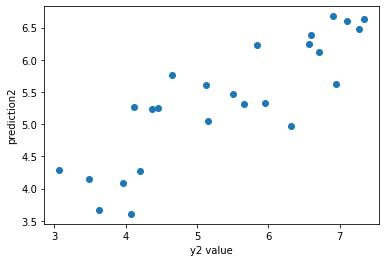

In [399]:
plt.scatter(y2_test, prediction2)
#plt.plot(X2_test, prediction2)
plt.xlabel('y2 value')
plt.ylabel('prediction2')

Text(0, 0.5, 'Happiness')

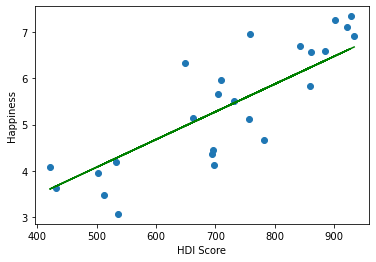

In [400]:
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, prediction2, color = 'green') 
plt.xlabel('HDI Score')
plt.ylabel('Happiness')

In [401]:
dependency_analysis = smf.ols('HappinessScore ~ HDI', df).fit()
dependency_analysis.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     237.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           3.10e-30
Time:                        17:08:04   Log-Likelihood:                -122.91
No. Observations:                 122   AIC:                             249.8
Df Residuals:                     120   BIC:                             255.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8950      0.306      2.921      0.004       0.288       1.502
HDI            0.0062      0.000     15.416      0.000       0.005       0.007
==============================================================================
Omnibus:                        3.079   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.572
Skew:                          -0.242   Prob(JB):                        0.276
Kurtosis:                       2.479   Cond. No.                     3.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [402]:
value = np.array(900).reshape(1,1)
linear2.predict(value)

array([6.47152466])

In conclusion, none of calculated R-squared values were near 1 and it means that none of 3 linear regresion models fit the data perfeclly, but the second regression has the highest R-square. From correlations table it can be observed that all kinds af alcohol correlate with happiness score onlyon average, but with HDI and GDP per Capita indexes happiness corellates more.